1. Модель Арима ARiMA или профет
2. 


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
plt.style.use('seaborn') 
import plotly.express as px
from sklearn import preprocessing 

In [2]:
# Загружаем данные по потреблению электроэнергии 
vvod_1 = pd.read_csv('/home/aleksandr/Документы/GitHub/data/GDN/Energy/Ввод-1 с 07.09.2021 по 28.05.2022.csv')
vvod_2 = pd.read_csv('/home/aleksandr/Документы/GitHub/data/GDN/Energy/Ввод-2 с 07.09.2021 по 28.05.2022.csv')
egpa1 = pd.read_csv('/home/aleksandr/Документы/GitHub/data/GDN/Energy/ЭГПА-1 с 07.09.2021 по 28.05.2022.csv')
egpa2 = pd.read_csv('/home/aleksandr/Документы/GitHub/data/GDN/Energy/ЭГПА-2 с 07.09.2021 по 28.05.2022.csv')
egpa3 = pd.read_csv('/home/aleksandr/Документы/GitHub/data/GDN/Energy/ЭГПА-3 с 07.09.2021 по 28.05.2022.csv')

# Загрузка данных по расходу газа
Gas_sep_march = pd.read_csv('/home/aleksandr/Документы/GitHub/data/GDN/Gas/Расход газа с 07.09.2021 по 28.05.2022.csv')

In [3]:
# Удаляем дату и время чтобы исключить дублирование в дальнейшем при объединении массивов
vvod_1.drop(vvod_1.columns[[0,1]], axis=1, inplace=True)
df = pd.concat([vvod_1, vvod_2], axis = 1)

In [4]:
# Сложение мощностей по обоим вводам и удаление избыточных столбцов
df['Активная мощность, кВт'] = df ['P, кВт'] + df['A+, кВт']
df['Reactive power'] = df ['R, квар'] + df['R+, квар']
drop_colums = ['P, кВт', 'R, квар', 'A+, кВт', 'R+, квар', 'Reactive power']
df.drop(drop_colums, axis=1, inplace=True)
df.head()

,Дата,Время,"Активная мощность, кВт"
0,07.09.2021,00:00-01:00,23178
1,07.09.2021,01:00-02:00,23088
2,07.09.2021,02:00-03:00,23094
3,07.09.2021,03:00-04:00,23076
4,07.09.2021,04:00-05:00,23034


In [5]:
df['Дата'] = pd.to_datetime(df['Дата'], format="%d.%m.%Y")
df.drop(['Время'], axis=1, inplace=True)

In [8]:
# Преобразование столбца время в указание часа

#def take_hour(time_df):
#    if time_df == '21:00-22:00':
#        return 22
#    elif time_df == '22:00-23:00':
#        return 23
#    elif time_df == '23:00-24:00':
#        return 24
#    elif time_df == '00:00-01:00':
#        return 1
#    elif time_df == '01:00-02:00':
#        return 2
#    elif time_df == '02:00-03:00':
#        return 3
#    elif time_df == '03:00-04:00':
#        return 4
#    elif time_df == '04:00-05:00':
#        return 5
#    elif time_df == '05:00-06:00':
#        return 6
#    elif time_df == '06:00-07:00':
#        return 7
#    elif time_df == '07:00-08:00':
#        return 8
#    elif time_df == '08:00-09:00':
#        return 9
#    elif time_df == '09:00-10:00':
#        return 10
#    elif time_df == '10:00-11:00':
#        return 11
#    elif time_df == '11:00-12:00':
#        return 12
#    elif time_df == '12:00-13:00':
#        return 13
#    elif time_df == '13:00-14:00':
#        return 14
#    elif time_df == '14:00-15:00':
#        return 15
#    elif time_df == '15:00-16:00':
#        return 16
#    elif time_df == '16:00-17:00':
#        return 17
#    elif time_df == '17:00-18:00':
#        return 18
#    elif time_df == '18:00-19:00':
#        return 19
#    elif time_df == '19:00-20:00':
#        return 20
#    elif time_df == '20:00-21:00':
#        return 21
#    else: return 0     

#df['Час'] = df['Время'].apply(take_hour)     

# Удаляем не нужные столбцы
#df.drop(['Дата', 'Время'], axis=1, inplace=True) 

In [6]:
# Добавляем столбцы с ЭГПА 1-3

df_1 = pd.concat([df, egpa1['A+, кВт']], axis = 1)
df_1.rename(columns={'A+, кВт': 'EGPA1'}, inplace = True)
df_1 = pd.concat([df_1, egpa2['A+, кВт']], axis = 1)
df_1.rename(columns={'A+, кВт': 'EGPA2'}, inplace = True)
df_1 = pd.concat([df_1, egpa3['A+, кВт']], axis = 1)
df_1.rename(columns={'A+, кВт': 'EGPA3'}, inplace = True)

In [7]:
# Преобразовываем формата строка в формат числа с плавающей точкой признаков ЭГПА

df_1['EGPA1'] = df_1['EGPA1'].apply(lambda x: float(x.replace(',', '.')))
df_1['EGPA2'] = df_1['EGPA2'].apply(lambda x: float(x.replace(',', '.')))
df_1['EGPA3'] = df_1['EGPA3'].apply(lambda x: float(x.replace(',', '.')))

In [8]:
# Указываем включен ли ЭГПА -1 либо отключен -0

df_1['EGPA1'] = df_1['EGPA1'].apply(lambda x: 1 if x != 0 else 0)
df_1['EGPA2'] = df_1['EGPA2'].apply(lambda x: 1 if x != 0 else 0)
df_1['EGPA3'] = df_1['EGPA3'].apply(lambda x: 1 if x != 0 else 0)

In [9]:
# Добавляем признак - расход газа

energy_gas = pd.concat([df_1, Gas_sep_march['Расход газа, м3']], axis = 1) 
energy_gas.head()

,Дата,"Активная мощность, кВт",EGPA1,EGPA2,EGPA3,"Расход газа, м3"
0,2021-09-07,23178,1,1,0,977086
1,2021-09-07,23088,1,1,0,981651
2,2021-09-07,23094,1,1,0,975946
3,2021-09-07,23076,1,1,0,971551
4,2021-09-07,23034,1,1,0,971358


In [10]:
# Группировка данных по дате
df_grouped = energy_gas.groupby(['Дата'], as_index=False, sort=False).agg({'Активная мощность, кВт': 'sum', 'EGPA1': 'mean', 'EGPA2': 'mean', 'EGPA3': 'mean',
                                                                     'Расход газа, м3': 'sum'})
df_grouped.head()

,Дата,"Активная мощность, кВт",EGPA1,EGPA2,EGPA3,"Расход газа, м3"
0,2021-09-07,552486,1.0,1.0,0.0,23310399
1,2021-09-08,550836,1.0,1.0,0.0,23297724
2,2021-09-09,549078,1.0,1.0,0.0,23092526
3,2021-09-10,538506,1.0,1.0,0.0,23095056
4,2021-09-11,531846,1.0,1.0,0.0,22858818


In [11]:
# Выделение из даты: месяца, дня.
df_grouped['month'] = df_grouped['Дата'].dt.month
df_grouped['day'] = df_grouped['Дата'].dt.day
df_grouped.head(2)

,Дата,"Активная мощность, кВт",EGPA1,EGPA2,EGPA3,"Расход газа, м3",month,day
0,2021-09-07,552486,1.0,1.0,0.0,23310399,9,7
1,2021-09-08,550836,1.0,1.0,0.0,23297724,9,8


In [16]:
fig = px.line(
    data_frame=df_grouped, 
    x='Дата',
    y='Активная мощность, кВт', 
    height=500, 
    width=1000, 
    title='Зависимости потребления ЭЭ от даты' 
)
fig.show()

In [12]:
fig = px.line(
    data_frame=df_grouped,
    x='Дата', 
    y='Расход газа, м3', 
    height=500, 
    width=1000, 
    title='Зависимости расхода газа от даты'
)
fig.show()

In [13]:
# Удаляем время

#df_grouped.drop('Дата', axis=1, inplace=True)
df_grouped.drop(['Дата', 'day'], axis=1, inplace=True)

### Корреляция признаков с целевым признаком Active power

<AxesSubplot:>

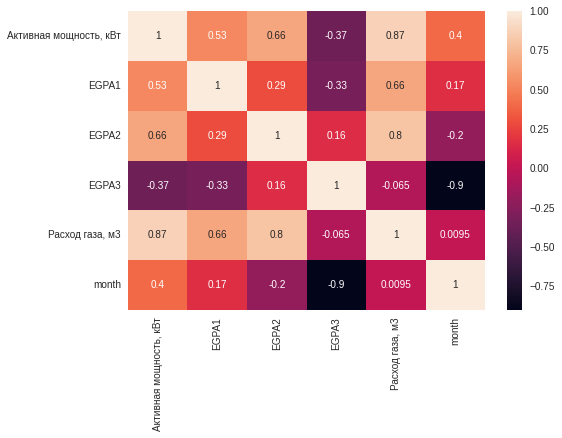

In [14]:
# Тепловая карта корреляции
sns.heatmap(df_grouped.corr(), annot=True)

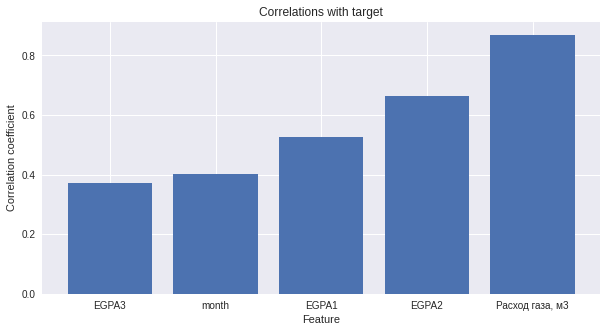

In [21]:
corr_with_target = df_grouped.corr()['Активная мощность, кВт'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('Активная мощность, кВт')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

### <center> Нормализация и стандартизация

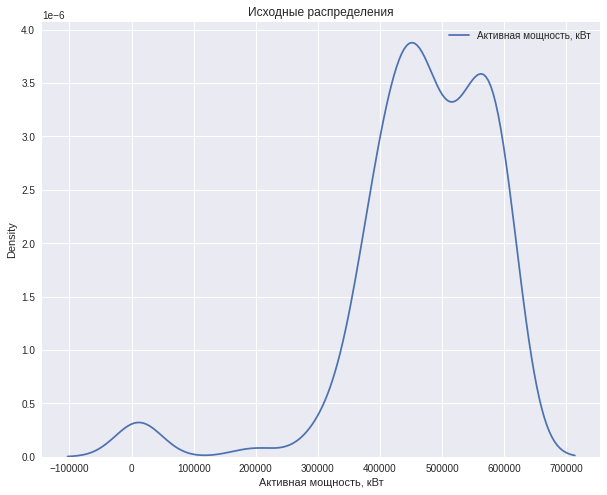

In [50]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df_grouped['Активная мощность, кВт'], ax=ax1, label ='Активная мощность, кВт')
#sns.kdeplot(df_grouped['Расход газа, м3'], ax=ax1, label ='Расход газа, м3')
plt.legend()

<AxesSubplot:title={'center':'После нормализации MinMaxScaler'}, xlabel='Активная мощность, кВт', ylabel='Density'>

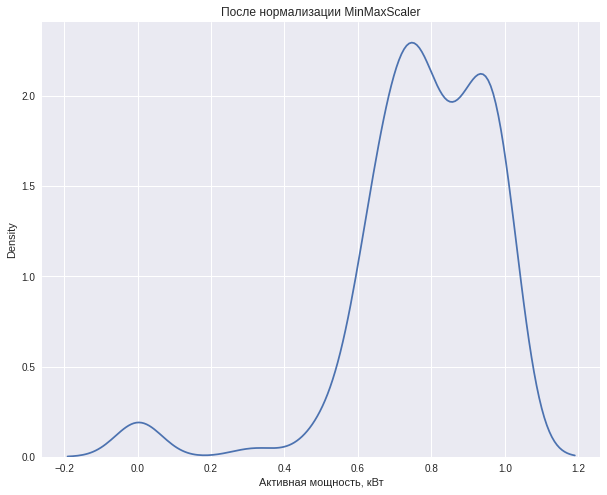

In [90]:
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df_grouped[['Активная мощность, кВт',]])
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=['Активная мощность, кВт'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['Активная мощность, кВт'], ax=ax1, label ='Активная мощность, кВт')
plt.legend()

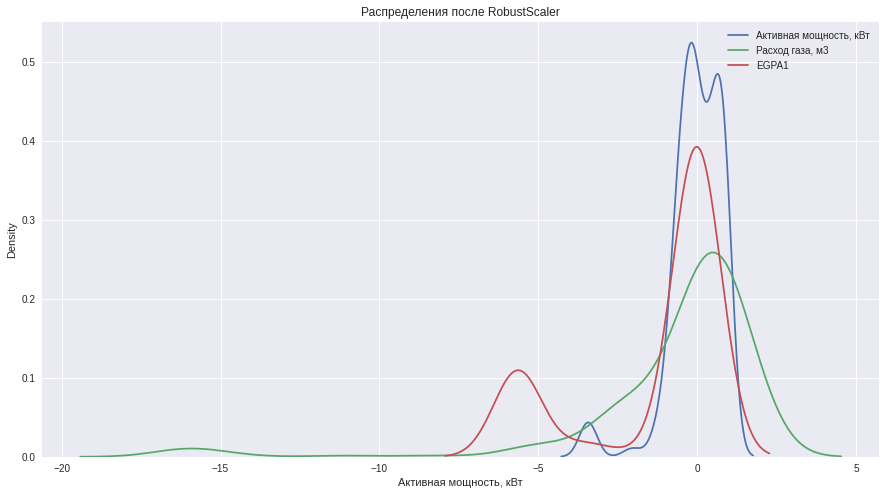

In [107]:
col_names = list(df_grouped.columns)

r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df_grouped)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(15, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['Активная мощность, кВт'], ax=ax1, label ='Активная мощность, кВт')
sns.kdeplot(df_r['Расход газа, м3'], ax=ax1, label ='Расход газа, м3')
sns.kdeplot(df_r['EGPA1'], ax=ax1, label ='EGPA1')
#sns.kdeplot(df_r['EGPA2'], ax=ax1, label ='EGPA2')
#sns.kdeplot(df_r['EGPA3'], ax=ax1, label ='EGPA3')
#sns.kdeplot(df_r['month'], ax=ax1, label ='month')
plt.legend()

### <center> Разбиение данных на тренировочные и тестовые

In [16]:
df_copy = df_grouped.copy()

In [40]:
df_copy['Активная мощность, кВт'] = np.log(df_copy['Активная мощность, кВт']+1)
df_copy['Расход газа, м3'] = np.log(df_copy['Расход газа, м3']+1)

In [41]:
from sklearn.model_selection import train_test_split

y = df_copy['Активная мощность, кВт']
X = df_copy.drop(columns=['Активная мощность, кВт'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape[0])
print(X_test.shape[0])

211
53


out of time validation 
разделить Х на тренировочные и валидационные

### <center> Обучение модели линейной регрессии

In [37]:
from sklearn import metrics
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model.fit(X_train, y_train)
 
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

In [38]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.5f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.5f}'.format(round(metrics.mean_absolute_error(y_train, y_train_predict))))
    print('Train MAPE: {:.5f}'.format(round(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100)))
    print('\n')
    print('Test R^2: {:.5f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.5f}'.format(round(metrics.mean_absolute_error(y_test, y_test_predict))))
    print('Train MAPE: {:.5f}'.format(round(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100)))
    
    
print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.94650
Train MAE: 22037.00000
Train MAPE: 10.00000


Test R^2: 0.71686
Test MAE: 24974.00000
Train MAPE: 5.00000


**Численное решение: метод стохастического градиентного спуска (SGD):**

In [20]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Инициализируем объект класса линейная регрессия
sgd_lr = linear_model.SGDRegressor(random_state=42)
#Обучаем модель - ищем параметры
sgd_lr.fit(X_train_scaled, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = sgd_lr.predict(X_train_scaled)
y_test_pred = sgd_lr.predict(X_test_scaled)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.91968
Train MAE: 26852.00000
Train MAPE: 14.00000


Test R^2: 0.70503
Test MAE: 27819.00000
Train MAPE: 6.00000


/home/aleksandr/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [21]:
#создаем логарифмированный целевой признак цены
y_train_log = np.log(y_train)

#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель предсказывать логарифм целевого признака
lr.fit(X_train, y_train_log)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = np.exp(lr.predict(X_train))
y_test_pred = np.exp(lr.predict(X_test))
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.87118
Train MAE: 27565.00000
Train MAPE: 8.00000


Test R^2: 0.43490
Test MAE: 31405.00000
Train MAPE: 7.00000


**Добавим полиномиальные признаки**

In [22]:
from sklearn import preprocessing

#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)
#Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(211, 20)
(53, 20)


In [23]:
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_poly)

print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.96219
Train MAE: 17571.00000
Train MAPE: 6.00000


Test R^2: 0.65038
Test MAE: 24747.00000
Train MAPE: 5.00000


### <center> Обучение модели случайного леса

In [44]:
from sklearn import ensemble 

rf_r = ensemble.RandomForestRegressor(
    n_estimators=300, 
    max_depth=10, 
    random_state=42 
)

rf_r.fit(X_train, y_train)
y_pred_train = np.exp(rf_r.predict(X_train))-1
y_pred_test = np.exp(rf_r.predict(X_test))-1
y_train = np.exp(y_train)-1
y_test = np.exp(y_test)-1
print_metrics(y_train, y_pred_train, y_test, y_pred_test)

Train R^2: 0.97403
Train MAE: 7940.00000
Train MAPE: 2.00000


Test R^2: 0.91345
Test MAE: 12732.00000
Train MAPE: 3.00000


In [47]:
y_pred_test = np.exp(y_pred_test)

In [52]:
y_pred_test = pd.DataFrame(y_pred_test)

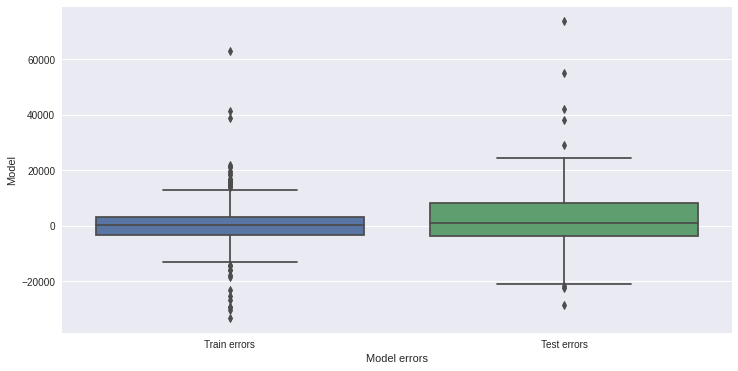

In [25]:
#Визуализируем ошибки

y_train_errors = y_train - y_pred_train
y_test_errors = y_test - y_pred_test
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)

fig, ax = plt.subplots(figsize=(12, 6)) 
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors') 
ax.set_ylabel('Model'); 

### Подбор гиперпараметров

In [45]:
import optuna

random_state = 42

def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 300, 20)
  max_depth = trial.suggest_int('max_depth', 14, 40, 2)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 7, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  # обучаем модель
  model.fit(X_train, y_train)
  score = cross_val_score(model, X, y, cv=5, scoring="f1", n_jobs=-1).mean()
  #
  return score # Вывести score

study = optuna.create_study(study_name="RandomForestRegressor", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

model = ensemble.RandomForestRegressor(**study.best_params,random_state=random_state)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print('Test R^2: {:.5f}'.format(metrics.r2_score(y_test, y_test_pred)))

[I 2022-06-17 22:35:33,642] A new study created in memory with name: RandomForestRegressor
[W 2022-06-17 22:35:33,649] Trial 0 failed because of the following error: ValueError("Unknown label type: 'continuous'")
Traceback (most recent call last):
  File "/home/aleksandr/anaconda3/lib/python3.8/site-packages/optuna/study/_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_4672/2910012125.py", line 17, in optuna_rf
    model.fit(X_train, y_train)
  File "/home/aleksandr/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 367, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/home/aleksandr/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 734, in _validate_y_class_weight
    check_classification_targets(y)
  File "/home/aleksandr/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 197, in check_classification_targets
    raise ValueError("Unknown lab

ValueError: Unknown label type: 'continuous'

### <center> Решение с помощью стекинга

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [
    ('lr', RidgeCV()),
    ('dt', DecisionTreeRegressor(random_state=42))
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=300,
                                          max_depth=10,
                                          random_state=42)
)

reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.95574
Train MAE: 16312.00000
Train MAPE: 26.00000


Test R^2: 0.84239
Test MAE: 18405.00000
Train MAPE: 4.00000


# <center> Решение с помощью XGBoost

In [33]:
import xgboost as xgb

xgbreg = xgb.XGBRegressor(n_estimators=1000)
#print(X_train.columns)
xgbreg.fit(X_train, y_train,
        eval_set=[(X_train, y_train)],
        early_stopping_rounds=20,
        verbose=False)

y_pred_train = xgbreg.predict(X_train)
y_pred_test = xgbreg.predict(X_test)

print_metrics(y_train, y_pred_train, y_test, y_pred_test)

/home/aleksandr/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



Train R^2: 1.00000
Train MAE: 0.00000
Train MAPE: 0.00000


Test R^2: 0.91197
Test MAE: 12565.00000
Train MAPE: 3.00000


### <center> Предсказание потребления ЭЭ с 01.06.22 по 31.12.22

In [100]:
Gas_june_december = pd.read_csv('/home/aleksandr/Документы/GitHub/data/GDN/Gas/Расход газа с 01.06.2022 по 31.12.2022.csv')

In [83]:
Gas_june_december.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Время                214 non-null    datetime64[ns]
 1   Расход газа, млн.м3  214 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [91]:
Gas_june_december['Время'] = pd.to_datetime(Gas_june_december['Время'])
#Gas_june_december['month'] = Gas_june_december['Время'].dt.month
#Gas_june_december.drop(['Время'], axis=1, inplace=True)

In [1]:
#Gas_june_december['Время'] = pd.to_datetime(Gas_june_december['Время'], format="%Y.%d.%m")

In [99]:
Gas_june_december['month'] = Gas_june_december['Время'].dt.month
Gas_june_december

,Время,"Расход газа, млн.м3",month
0,2022-01-06,0.001,1
1,2022-02-06,0.001,2
2,2022-03-06,0.001,3
3,2022-04-06,0.001,4
4,2022-05-06,0.001,5
...,...,...,...
209,2022-12-27,18.753,12
210,2022-12-28,18.753,12
211,2022-12-29,18.753,12
212,2022-12-30,18.753,12


In [84]:
y_pred_train = rf_r.predict(Gas_june_december)

,Время,"Расход газа, млн.м3"
0,2022-01-06,0.001
1,2022-02-06,0.001
2,2022-03-06,0.001
3,2022-04-06,0.001
4,2022-05-06,0.001
...,...,...
209,2022-12-27,18.753
210,2022-12-28,18.753
211,2022-12-29,18.753
212,2022-12-30,18.753
